In [2]:
'''
author: Felix Hol
date: 2021 May 20
content: process DeepLabCut detections for multiple animals that mainly move in one direction
'''

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
import numpy as np
import os
from tqdm.notebook import tnrange, tqdm
import glob
import math
import deeplabcut
import pickle

In [3]:
### Load DLC detections and a dataframe to steal the header for convenience

fullDLCpickle = '/mnt/DATA/geckos/test_b8/021118_38394041shortDLC_resnet50_gekApr30shuffle1_180000_full.pickle'
DLCdf = '/mnt/DATA/geckos/test_b8/021118_38394041shortDLC_resnet50_gekApr30shuffle1_180000_bx.h5'


In [4]:
g = pd.read_hdf(DLCdf)
f = pd.read_pickle(fullDLCpickle)

In [5]:
header = f.pop('metadata')

In [24]:
### create empty dataframe to move data to

df = pd.DataFrame(columns=g.columns, index=range(header['nframes']))
scorer = df.columns.get_level_values(0)[0]

In [25]:
### first get coordinates for all arena corners to use to assign animals to tracks

bpts = ['topleftcorner', 'toprightcorner', 'bottomrightcorner', 'bottomleftcorner']

scorer = df.columns.get_level_values(0)[0]
ind = 'single'

for bpt in tqdm(bpts):
    bptN = header['all_joints_names'].index(bpt)
    frameNames = list(f)

    for i in range(header['nframes']):
        try:
            df[scorer, ind, bpt, 'x'].loc[i] = f[frameNames[i]]['coordinates'][0][bptN][0][0]
            df[scorer, ind, bpt, 'y'].loc[i] = f[frameNames[i]]['coordinates'][0][bptN][0][1]
            df[scorer, ind, bpt, 'likelihood'].loc[i] = f[frameNames[i]]['confidence'][bptN][0][0]
        except:
            pass
    

In [27]:
nAnimal = 4
individuals = ['gecko1', 'gecko2', 'gecko3', 'gecko4']
top = df[scorer, 'single', 'toprightcorner'].y.mean()
bottom = df[scorer, 'single', 'bottomrightcorner'].y.mean() 
trackYs = np.linspace(top, bottom, nAnimal + 1)

scorer = df.columns.get_level_values(0)[0]
bpt = 'head'
bptN = header['all_joints_names'].index(bpt)
frameNames = list(f)

for i in tnrange(header['nframes']):
    try:
        j = 0
        for coor in f[frameNames[i]]['coordinates'][0][bptN]:
            x = coor[0]
            y = coor[1]
            c = f[frameNames[i]]['confidence'][0][j][0]
            j = j +1
            if y > top + 15:
                indN = next(x for x, val in enumerate(trackYs) if val > y)
                ind = individuals[indN - 1]
                df[scorer, ind, bpt, 'x'].loc[i] = x
                df[scorer, ind, bpt, 'y'].loc[i] = y
                df[scorer, ind, bpt, 'likelihood'].loc[i] = c
    except:
        pass

In [ ]:
df.loc[df[scorer, 'gecko2', bpt, 'y'] < 10]

In [ ]:
df.head()

/home/felix/anaconda3/envs/dlc-gpu3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2878: PerformanceWarning: indexing past lexsort depth may impact performance.
  raw_cell, store_history, silent, shell_futures)
/home/felix/anaconda3/envs/dlc-gpu3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2878: PerformanceWarning: indexing past lexsort depth may impact performance.
  raw_cell, store_history, silent, shell_futures)
/home/felix/anaconda3/envs/dlc-gpu3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2878: PerformanceWarning: indexing past lexsort depth may impact performance.
  raw_cell, store_history, silent, shell_futures)
/home/felix/anaconda3/envs/dlc-gpu3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2878: PerformanceWarning: indexing past lexsort depth may impact performance.
  raw_cell, store_history, silent, shell_futures)
/home/felix/anaconda3/envs/dlc-gpu3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:287

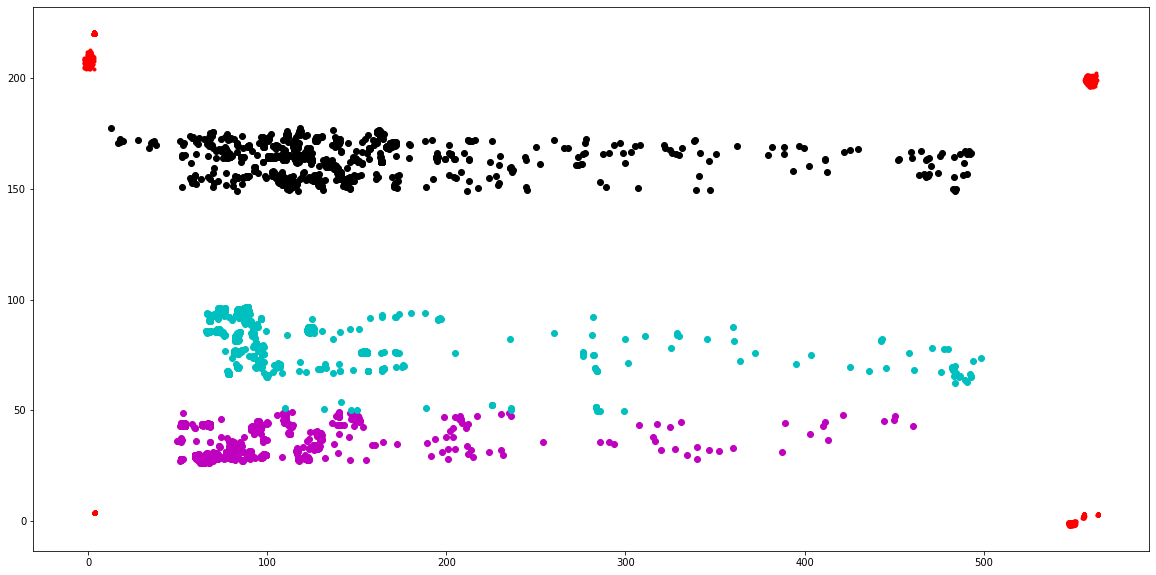

In [33]:
plt.figure(figsize=(20,10))

plt.plot(df[scorer, 'single', 'topleftcorner'].x, df[scorer, 'single', 'topleftcorner'].y, '.r')
plt.plot(df[scorer, 'single', 'toprightcorner'].x, df[scorer, 'single', 'toprightcorner'].y, '.r')
plt.plot(df[scorer, 'single', 'bottomleftcorner'].x, df[scorer, 'single', 'bottomleftcorner'].y, '.r')
plt.plot(df[scorer, 'single', 'bottomrightcorner'].x, df[scorer, 'single', 'bottomrightcorner'].y, '.r')

plt.plot(df[scorer, 'gecko1', bpt].x, df[scorer, 'gecko1', bpt].y, 'om')
plt.plot(df[scorer, 'gecko2', bpt].x, df[scorer, 'gecko2', bpt].y, 'oc')
# plt.plot(df[scorer, 'gecko3', bpt].x, df[scorer, 'gecko3', bpt].y, 'oc')
plt.plot(df[scorer, 'gecko4', bpt].x, df[scorer, 'gecko4', bpt].y, 'ok')

In [ ]:
###save new dataframe

newFile = '/mnt/DATA/geckos/test_b8/021118_38394041shortDLC_resnet50_gekApr30shuffle1_180000_sk.h5'
df.to_hdf(newFile, key="df_with_missing", mode="w")

Two figures to compare the output of the box tracker (with non-optimized parameters, most likely) and the y-sorted detections:

/home/felix/anaconda3/envs/dlc-gpu3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2878: PerformanceWarning: indexing past lexsort depth may impact performance.
  raw_cell, store_history, silent, shell_futures)
/home/felix/anaconda3/envs/dlc-gpu3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2878: PerformanceWarning: indexing past lexsort depth may impact performance.
  raw_cell, store_history, silent, shell_futures)
/home/felix/anaconda3/envs/dlc-gpu3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2878: PerformanceWarning: indexing past lexsort depth may impact performance.
  raw_cell, store_history, silent, shell_futures)
/home/felix/anaconda3/envs/dlc-gpu3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2878: PerformanceWarning: indexing past lexsort depth may impact performance.
  raw_cell, store_history, silent, shell_futures)


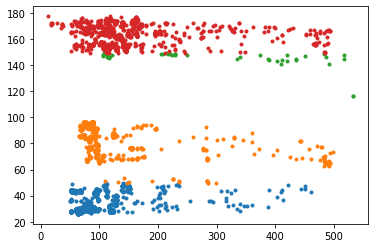

In [34]:
#### Y sorted data

plt.plot(df[scorer, 'gecko1', bpt].x, df[scorer, 'gecko1', bpt].y, '.')
plt.plot(df[scorer, 'gecko2', bpt].x, df[scorer, 'gecko2', bpt].y, '.')
plt.plot(df[scorer, 'gecko3', bpt].x, df[scorer, 'gecko3', bpt].y, '.')
plt.plot(df[scorer, 'gecko4', bpt].x, df[scorer, 'gecko4', bpt].y, '.')

/home/felix/anaconda3/envs/dlc-gpu3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2878: PerformanceWarning: indexing past lexsort depth may impact performance.
  raw_cell, store_history, silent, shell_futures)
/home/felix/anaconda3/envs/dlc-gpu3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2878: PerformanceWarning: indexing past lexsort depth may impact performance.
  raw_cell, store_history, silent, shell_futures)
/home/felix/anaconda3/envs/dlc-gpu3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2878: PerformanceWarning: indexing past lexsort depth may impact performance.
  raw_cell, store_history, silent, shell_futures)
/home/felix/anaconda3/envs/dlc-gpu3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2878: PerformanceWarning: indexing past lexsort depth may impact performance.
  raw_cell, store_history, silent, shell_futures)


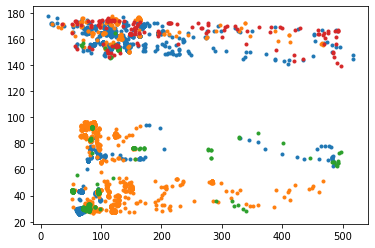

In [35]:
### box tracker:

plt.plot(g[scorer, 'gecko1', bpt].x, g[scorer, 'gecko1', bpt].y, '.')
plt.plot(g[scorer, 'gecko2', bpt].x, g[scorer, 'gecko2', bpt].y, '.')
plt.plot(g[scorer, 'gecko3', bpt].x, g[scorer, 'gecko3', bpt].y, '.')
plt.plot(g[scorer, 'gecko4', bpt].x, g[scorer, 'gecko4', bpt].y, '.')